## AutoEncode 노이즈 제거_CNN
---
- 데이터 노이즈 제거에 활용
- 데이터에서 주요 특징만 추출, 압축하기 때문에 노이즈는 주요 특징에서 제거됨
- 압축된 주요 특징으로 데이터 복원 => 노이즈 제거

In [1]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 준비 및 로딩
---

In [2]:
# W, b 고정하도록 seed 설정
set_random_seed(11)

In [3]:
# load_data() 함수를 호출하면 NumPy 어레이의 튜플을 반환
mnist = load_data()
(X_train, y_train), (X_test, y_test) = load_data()
print(f'X_train.shape : {X_train.shape}\ny_train.shape : {y_train.shape}')
print(f'X_test.shape  : {X_test.shape}\ny_test.shape  : {y_test.shape}')

X_train.shape : (60000, 28, 28)
y_train.shape : (60000,)
X_test.shape  : (10000, 28, 28)
y_test.shape  : (10000,)


## [2] 데이터 전처리 및 학습형태로 변환

In [4]:
# 스케일링 => 픽셀 / 255.0
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
# CNN은 3차원을 넣어야 하기 때문에
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)   

In [6]:
print(f'X_train.shape : {X_train.shape}')  # 학습용
print(f'X_test.shape  : {X_test.shape}')   # 테스트용

X_train.shape : (60000, 28, 28, 1)
X_test.shape  : (10000, 28, 28, 1)


In [7]:
print(f'X_train.shape : {X_train.shape}\nX_test.shape  : {X_test.shape}')
print(f'y_train.shape : {y_train.shape}\ny_test.shape  : {y_test.shape}')

X_train.shape : (60000, 28, 28, 1)
X_test.shape  : (10000, 28, 28, 1)
y_train.shape : (60000,)
y_test.shape  : (10000,)


In [8]:
# 노이즈 삽입 : 데이터셋에 노이즈 추가
# np.random.normal(평균loc=0.0, 표준편차scale=1.0, 출력size=None)
X_train_noised = X_train + np.random.normal(0, 0.5, size = X_train.shape)
X_test_noised = X_test + np.random.normal(0, 0.5, size = X_test.shape)

# 값 변환 : 각 픽셀의 범위를 0.0 - 1.0으로 맞춰 주기 위해 조정
# np.clip(array, min, max)
X_train_noised = np.clip(X_train_noised, a_min=0, a_max=1)
X_test_noised = np.clip(X_test_noised, a_min=0, a_max=1)

In [9]:
# 노이즈 추가한 데이터들의 resahpe
X_train_noised = X_train_noised.reshape(-1, 28, 28, 1)
X_test_noised = X_test_noised.reshape(-1, 28, 28, 1)

In [10]:
X_train_noised[0].shape, X_train[0].shape

((28, 28, 1), (28, 28, 1))

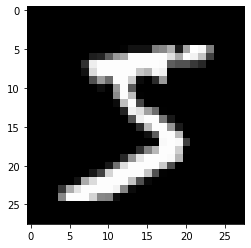

In [11]:
# 원본 데이터
plt.imshow(X_train[0], cmap='gray')
# plt.imshow(X_train[0].reshape(-1, 28,28, 1), cmap='gray')
plt.show()

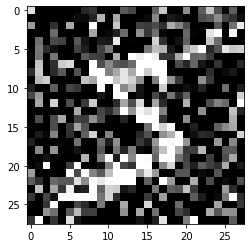

In [12]:
# 노이즈 추가 데이터
plt.imshow(X_train_noised[0], cmap='gray')
# plt.imshow(X_train_noised[0].reshape(28,28), cmap='gray')
plt.show()

## [3] 모델 생성 및 학습

In [19]:
# 필터 수 조절하도록 모델 만드는 함수
def createAEModel(n_filter):
    model = Sequential()
    model.add(Conv2D(filters=n_filter, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
    # model.add(MaxPool2D()) => 같은 모양이 나와야 하니까 (En/De)
    # model.add(Flatten())
    model.add(Conv2D(filters=1, kernel_size=3, padding='same', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = 'adam') #, metrics='accuracy')
                        # 입력, 출력 2개로 일단 생각하고 있자
    return model   

In [20]:
oneModel = createAEModel(50)
twoModel = createAEModel(150)
thrModel = createAEModel(350)

In [21]:
oneModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 50)        500       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 1)         451       
                                                                 
Total params: 951
Trainable params: 951
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 시각화
# plot_model(oneModel, show_shapes=True)

- 과정 진행 -> 노이즈 제거 효과가 있다고 했으니
- 은닉층 개수 조절 -> 노이즈 제거 차이 보고

## [4] 모델 학습

In [23]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [24]:
### X값, y값 모두 입력 데이터로 (X도 내꺼, y도 내꺼)
# CNN -> 3차원으로 커지니까 시간은 더 걸리겠지
import tensorflow as tf
with tf.device("/device:CPU:0"):
    print('CPU')
    oneModel.fit(X_train_noised, X_train, epochs=3)
    twoModel.fit(X_train_noised, X_train, epochs=10)
    thrModel.fit(X_train_noised, X_train, epochs=10)

CPU
Epoch 1/3
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1375
Epoch 2/3
1875/1875 [==============================] - 57s 31ms/step - loss: 0.1134
Epoch 3/3
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1108
Epoch 1/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.1289
Epoch 2/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.1106
Epoch 3/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.1085
Epoch 4/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.1078
Epoch 5/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.1075
Epoch 6/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.1073
Epoch 7/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.1072
Epoch 8/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.1071
Epoch 9/10
1875/1875 [==============================] - 1

In [25]:
oneModel.evaluate(X_test_noised, X_test)
twoModel.evaluate(X_test_noised, X_test)
thrModel.evaluate(X_test_noised, X_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.1060


0.10600610077381134

## [5] 예측
---
- 새로운 데이터 사용

In [26]:
# 입력에 들어가는 값이 그대로 y값으로 들어가는 것
pre1 = oneModel.predict(X_train_noised[0].reshape(-1,28,28,1))
pre2 = twoModel.predict(X_train_noised[0].reshape(-1,28,28,1))
pre3 = thrModel.predict(X_train_noised[0].reshape(-1,28,28,1))

1/1 [==============================] - 0s 38ms/step


In [27]:
pre1.shape
pre2.shape
pre3.shape

(1, 28, 28, 1)

## 원본 이미지 - AE 진행된 이미지 비교

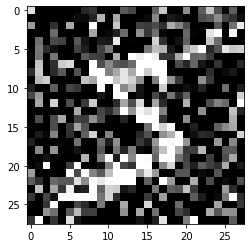

In [28]:
plt.imshow(X_train_noised[0].reshape(28,28), cmap='gray')
plt.show()

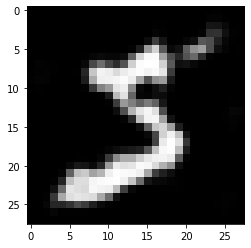

In [29]:
plt.imshow(pre1.reshape(28,28), cmap='gray')
plt.show()

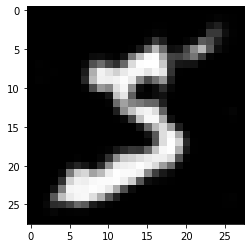

In [30]:
plt.imshow(pre2.reshape(28,28), cmap='gray')
plt.show()

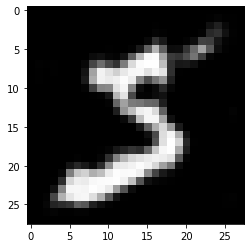

In [31]:
plt.imshow(pre3.reshape(28,28), cmap='gray')
plt.show()

In [26]:
# 300개나 500개나 비슷하다면 => 300개를 선택해야제